## Dependencies

In [94]:
import os
import csv
import pretty_midi as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm

## Basic Statistics

In [54]:
def load_midi(file_path):
    """
    Load a MIDI file.

    Parameters:
        file_path (str): The path to the MIDI file.

    Returns:
        PrettyMIDI: A PrettyMIDI object representing the loaded MIDI file.
    """
    midi_file = pm.PrettyMIDI(file_path)
    return midi_file


def get_midi_info(midi_file) -> list:
    """
    Extract features from loaded MIDI file.

    Parameters:
        midi_file: A loaded MIDI file (instance of PrettyMIDI class)

    Returns:
        list containing extracted features     
    """
    # Get the key of the MIDI file
    try:
        key = midi_file.key_signature_changes[0].key_number
        key = pm.key_number_to_key_name(key)
    except:
        key = None
    
    # Get time signature
    try:
        time = midi_file.time_signature_changes[0]
        time_signature = f'{time.numerator}/{time.denominator}'
        # Get number of time signature changes
        num_signature_changes = len(midi_file.time_signature_changes)
    except:
        time_signature = None
        num_signature_changes = None

    # Get tempo
    try:
        tempo = round(midi_file.estimate_tempo())
        # Get tempo changes
        num_tempo_changes = len(midi_file.get_tempo_changes())
    except:
        tempo = None
        num_tempo_changes = None

    # Find the highest and lowest notes
    all_notes = [note for instrument in midi_file.instruments for note in instrument.notes]
    
    if all_notes:
        # Find the highest and lowest notes
        highest_note = max(all_notes, key=lambda note: note.pitch)
        lowest_note = min(all_notes, key=lambda note: note.pitch)

        highest_note = pm.note_number_to_name(highest_note.pitch)
        lowest_note = pm.note_number_to_name(lowest_note.pitch)
    else:
        print("No notes found in the MIDI file.")

    # Get end time
    end_time = round(midi_file.get_end_time())

    # Get resolution
    resolution = midi_file.resolution
    
    # Get enumeration of instruments
    instruments = [i.name.strip() for i in midi_file.instruments]
    
    return [key, time_signature, num_signature_changes, tempo, num_tempo_changes, highest_note, lowest_note, end_time, resolution, instruments]

In [55]:
folder_path = 'data/baroque_large_trainset_twopart/midi'
all_info = []

for file in tqdm(os.listdir(folder_path)):
    # Load midi file
    try:
        midi_file = load_midi(f'{folder_path}/{file}')
    except (OSError, ValueError, IndexError, EOFError, ZeroDivisionError):
        continue

    # Get basic statistics
    try:
        midi_info = get_midi_info(midi_file)
    except ValueError as e:
        print(f"Could not parse MIDI file {file}: {e}")
        continue

    # Store statistics
    all_info.append([file] + midi_info)

  0%|          | 0/18109 [00:00<?, ?it/s]/home/riemer/enter/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
  1%|▏         | 229/18109 [00:05<07:08, 41.73it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_2_7.mid: Can't provide a global tempo estimate when there are fewer than two notes.


  9%|▉         | 1715/18109 [00:43<05:44, 47.65it/s]

Could not parse MIDI file bach-js_chorales_069400b_(c)greentree_3_4.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 12%|█▏        | 2263/18109 [00:56<05:55, 44.60it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_11_12.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 23%|██▎       | 4153/18109 [01:43<08:58, 25.90it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_2_11.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 24%|██▍       | 4390/18109 [01:49<05:07, 44.61it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_7_11.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 27%|██▋       | 4924/18109 [02:02<04:34, 47.95it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_10_12.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 32%|███▏      | 5754/18109 [02:21<04:24, 46.63it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_2_10.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 36%|███▌      | 6545/18109 [02:40<03:06, 62.06it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_7_12.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 39%|███▉      | 7068/18109 [02:53<04:27, 41.25it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_6_7.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 41%|████      | 7446/18109 [03:02<04:18, 41.33it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_5_11.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 42%|████▏     | 7548/18109 [03:04<03:25, 51.36it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_6_12.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 49%|████▉     | 8935/18109 [03:37<02:44, 55.62it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_2_6.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 55%|█████▌    | 10030/18109 [04:02<02:07, 63.56it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_5_6.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 56%|█████▌    | 10104/18109 [04:04<04:44, 28.18it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_2_5.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 56%|█████▌    | 10124/18109 [04:05<03:54, 34.06it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_7_10.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 59%|█████▉    | 10760/18109 [04:20<02:29, 49.09it/s]

Could not parse MIDI file bach-js_chorales_069400b_(c)greentree_3_5.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 66%|██████▌   | 11932/18109 [04:48<01:56, 53.19it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_5_7.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 67%|██████▋   | 12130/18109 [04:53<02:10, 45.78it/s]

Could not parse MIDI file bach-js_chorales_069400b_(c)greentree_4_5.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 69%|██████▉   | 12581/18109 [05:04<01:44, 52.91it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_2_12.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 71%|███████   | 12836/18109 [05:11<02:33, 34.38it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_6_10.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 71%|███████▏  | 12910/18109 [05:13<02:05, 41.28it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_10_11.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 83%|████████▎ | 15051/18109 [06:04<01:02, 49.06it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_5_10.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 88%|████████▊ | 15981/18109 [06:27<00:51, 41.61it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_5_12.mid: Can't provide a global tempo estimate when there are fewer than two notes.


 92%|█████████▏| 16702/18109 [06:49<00:34, 40.78it/s]

Could not parse MIDI file vivaldi_4_stagioni_autunno_2_(c)pollen_6_11.mid: Can't provide a global tempo estimate when there are fewer than two notes.


100%|██████████| 18109/18109 [07:24<00:00, 40.71it/s]


In [56]:
# Write all midi info to csv file
with open('statistics.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Write header
    csv_writer.writerow(['File', 'Key', 'Time signature', 'Num time signature changes', 'Tempo', 'Num tempo changes', 'High note', 'Low note', 'End time', 'Resolution', 'Instruments'])

    for info in all_info:
        csv_writer.writerow(info)

## Statistical Analysis

In [105]:
data = pd.read_csv('statistics.csv')

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18072 entries, 0 to 18071
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   File                        18072 non-null  object 
 1   Key                         13208 non-null  object 
 2   Time signature              17088 non-null  object 
 3   Num time signature changes  17088 non-null  float64
 4   Tempo                       18072 non-null  int64  
 5   Num tempo changes           18072 non-null  int64  
 6   High note                   18072 non-null  object 
 7   Low note                    18072 non-null  object 
 8   End time                    18072 non-null  int64  
 9   Resolution                  18072 non-null  int64  
 10  Instruments                 18072 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.5+ MB


In [107]:
data.describe()

,Num time signature changes,Tempo,Num tempo changes,End time,Resolution
count,17088.000000,18072.000000,18072.0,18072.000000,18072.000000
mean,1.543305,156.702966,2.0,177.849546,519.277114
std,1.690273,44.894948,0.0,177.484512,340.096399
min,1.000000,32.000000,2.0,4.000000,48.000000
25%,1.000000,125.000000,2.0,71.000000,240.000000
50%,1.000000,157.000000,2.0,149.000000,384.000000
75%,1.000000,189.000000,2.0,228.000000,1024.000000
max,33.000000,298.000000,2.0,3750.000000,1024.000000


In [109]:
data.corr(numeric_only=True)

,Num time signature changes,Tempo,Num tempo changes,End time,Resolution
Num time signature changes,1.000000,0.011097,NaN,0.344433,-0.087576
Tempo,0.011097,1.000000,NaN,0.034382,-0.159710
Num tempo changes,NaN,NaN,NaN,NaN,NaN
End time,0.344433,0.034382,NaN,1.000000,-0.320579
Resolution,-0.087576,-0.159710,NaN,-0.320579,1.000000


## Visualizations

In [103]:
def plot_donut_chart(keys_counts):
    """
    Plot a donut chart for keys and their counts.
    """
    # Threshold for grouping keys into 'other' category
    threshold_percentage = 2.0

    # Filter out keys that appear in less than the threshold percentage
    total_count = sum(keys_counts.values())
    filtered_keys_counts = {key: count for key, count in keys_counts.items() if count / total_count >= threshold_percentage / 100.0}

    # Group remaining keys into 'other' category
    other_count = total_count - sum(filtered_keys_counts.values())
    filtered_keys_counts['Other'] = other_count

    labels, counts = zip(*filtered_keys_counts.items())

    # Increase the figsize to make the donut chart bigger
    fig, ax = plt.subplots(figsize=(8, 8))

    ax.pie(counts, labels=labels, autopct='%1.2f%%', startangle=90, wedgeprops=dict(width=0.4))

    # Draw a circle in the center to create a donut chart
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_patch(centre_circle)

    ax.axis('equal')  
    plt.title("Key Signature Distribution", loc='left', fontweight='bold', fontsize=14)
    plt.savefig('figures/key_signatures.png')
    plt.show()


def plot_boxplot(df_column, title, x_label, y_label, fig_out):
    """
    Plot a boxplot for a DataFrame column.
    """
    # Set Seaborn style
    sns.set(style="whitegrid")

    # Create a boxplot for the DataFrame column
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df_column)

    # Set titles and labels
    plt.title(title, fontweight='bold')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.savefig(fig_out)
    plt.show()

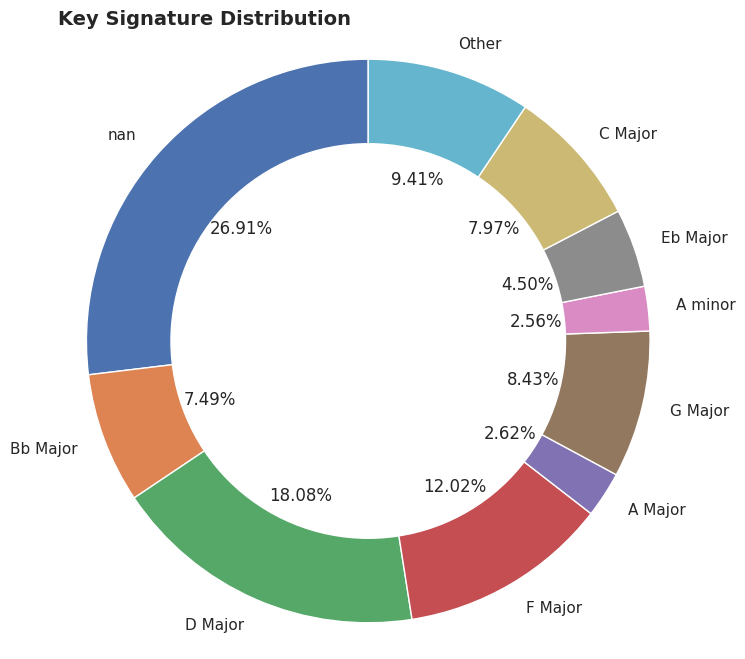

In [99]:
data = pd.read_csv('statistics.csv')

# Obtain all keys
keys_list = data['Key']

# Count the occurrences of each key
keys_counts = Counter(keys_list)

# Plot donut chart
plot_donut_chart(keys_counts)

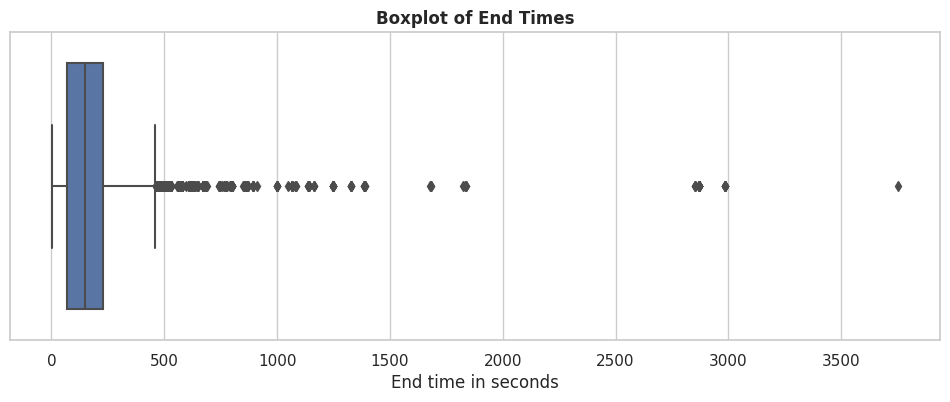

In [104]:
data = pd.read_csv('statistics.csv')

# Obtain all end times
end_times = data['End time']

title = 'Boxplot of End Times'
x_label = 'End time in seconds'
y_label = ''
fig_out = 'figures/end_times.png'

plot_boxplot(end_times, title, x_label, y_label, fig_out)